<a href="https://colab.research.google.com/github/Mahamat19/Elovvo_projects/blob/main/Task1_Student_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Load data

In [37]:
# Load the dataset (assume the file is named 'student_scores.csv')
df = pd.read_csv('/content/drive/MyDrive/ML Elevvo/Task1_Student_Score_Factor/StudentPerformanceFactors.csv')

# Display basic info and first few rows
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [39]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

Cleaning data and visualization

In [40]:
# Check for missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


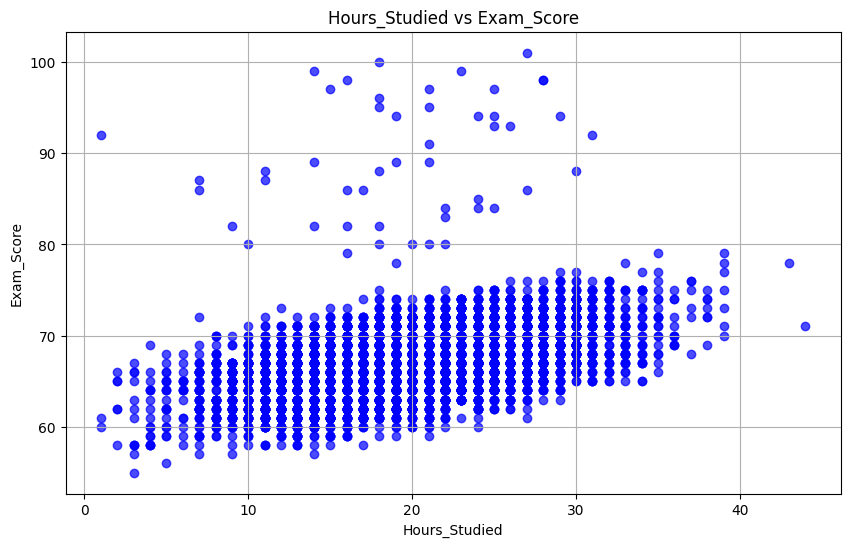

In [41]:
# Visualize the relationship between study hours and scores
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.7)
plt.title('Hours_Studied vs Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.grid(True)
plt.show()

Splitting data into train and test data

In [42]:
X = df[['Hours_Studied']]  # Feature (study hours)
y = df['Exam_Score']   # Target (exam scores)

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model

In [43]:
# Initialize and train the model (Training loop for Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display model coefficients
print(f"Intercept: {linear_model.intercept_:.2f}, Slope: {linear_model.coef_[0]:.2f}")

Intercept: 61.54, Slope: 0.29


Prediction and Evaluation

In [44]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate performance
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

print(f"MAE: {linear_mae:.2f}")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")

MAE: 2.44
MSE: 10.54
RMSE: 3.25
R² Score: 0.23


Visualization of predictions

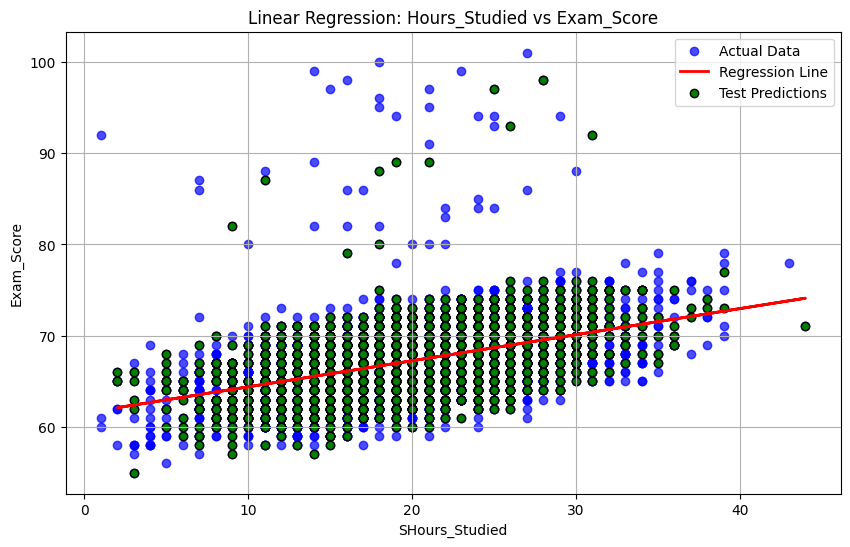

In [45]:
# Plot regression line and test predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.scatter(X_test, y_test, color='green', label='Test Predictions', edgecolors='black')
plt.title('Linear Regression: Hours_Studied vs Exam_Score')
plt.xlabel('SHours_Studied')
plt.ylabel('Exam_Score')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Polynomial Regression Models with degrees (2, 3, and 4)
degrees = [4, 5, 6]
poly_models = {}
poly_results = []

for degree in degrees:
    # Create polynomial features and linear regression pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Train the model
    poly_model.fit(X_train, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate performance
    poly_mae = mean_absolute_error(y_test, y_pred_poly)
    poly_mse = mean_squared_error(y_test, y_pred_poly)
    poly_rmse = np.sqrt(poly_mse)
    poly_r2 = r2_score(y_test, y_pred_poly)

    # Store results
    poly_models[degree] = poly_model
    poly_results.append({
        'Degree': degree,
        'MAE': poly_mae,
        'MSE': poly_mse,
        'RMSE': poly_rmse,
        'R2': poly_r2
    })

    print(f"\nPolynomial Regression (Degree {degree}) Performance:")
    print(f"MAE: {poly_mae:.2f}")
    print(f"MSE: {poly_mse:.2f}")
    print(f"RMSE: {poly_rmse:.2f}")
    print(f"R² Score: {poly_r2:.4f}")


Polynomial Regression (Degree 4) Performance:
MAE: 2.44
MSE: 10.55
RMSE: 3.25
R² Score: 0.2323

Polynomial Regression (Degree 5) Performance:
MAE: 2.44
MSE: 10.56
RMSE: 3.25
R² Score: 0.2316

Polynomial Regression (Degree 6) Performance:
MAE: 2.44
MSE: 10.59
RMSE: 3.25
R² Score: 0.2296


In [47]:
# Compare all models
comparison_df = pd.DataFrame([{
    'Model': 'Linear Regression',
    'MAE': linear_mae,
    'MSE': linear_mse,
    'RMSE': linear_rmse,
    'R2': linear_r2
}])

for result in poly_results:
    comparison_df = pd.concat([comparison_df, pd.DataFrame([{
        'Model': f'Polynomial (Degree {result["Degree"]})',
        'MAE': result['MAE'],
        'MSE': result['MSE'],
        'RMSE': result['RMSE'],
        'R2': result['R2']
    }])], ignore_index=True)

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                   Model       MAE        MSE      RMSE        R2
0      Linear Regression  2.436103  10.535841  3.245896  0.233198
1  Polynomial (Degree 4)  2.435393  10.548696  3.247876  0.232262
2  Polynomial (Degree 5)  2.436483  10.558401  3.249369  0.231556
3  Polynomial (Degree 6)  2.436379  10.585246  3.253498  0.229602


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


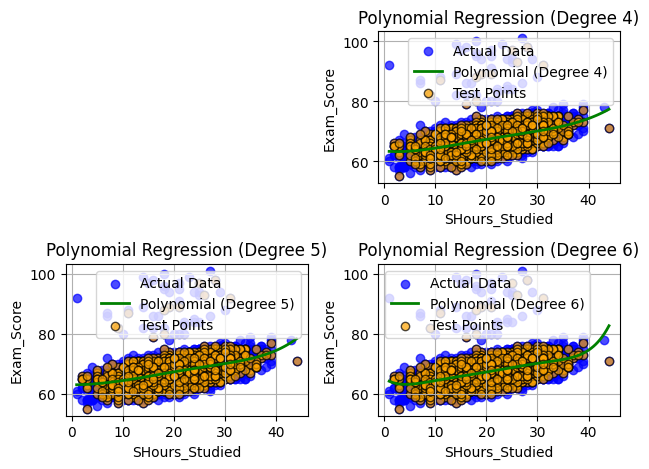

In [48]:
# Plot polynomial regressions
for i, degree in enumerate(degrees, 2):
    plt.subplot(2, 2, i)
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')

    # Generate predictions for smooth curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = poly_models[degree].predict(X_range)

    plt.plot(X_range, y_range, color='green', linewidth=2,
             label=f'Polynomial (Degree {degree})')
    plt.scatter(X_test, y_test, color='orange', edgecolors='black',
                label='Test Points', alpha=0.7)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('SHours_Studied')
    plt.ylabel('Exam_Score')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

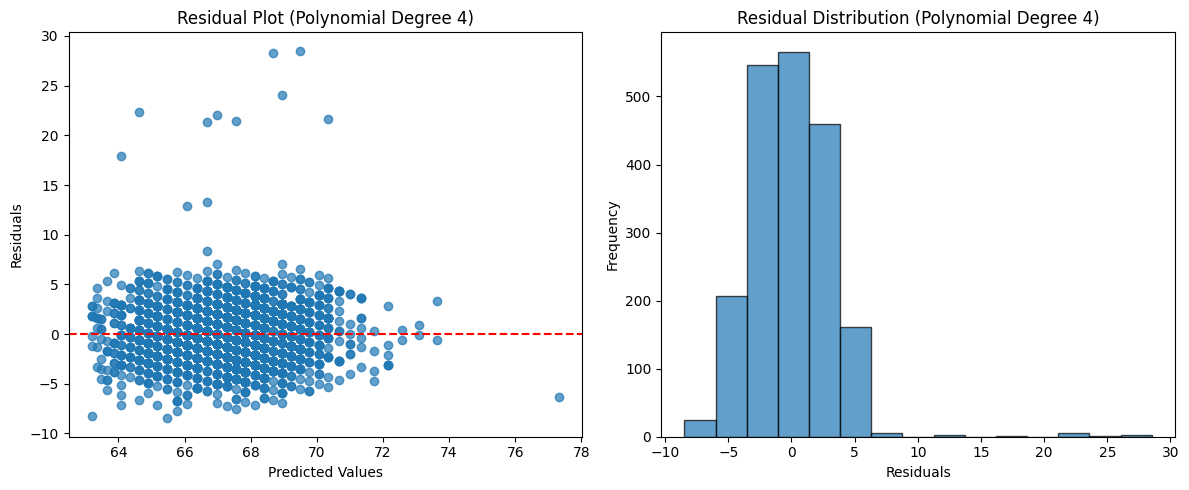

In [49]:
# Residual analysis for the best model
best_model_degree = poly_results[np.argmax([result['R2'] for result in poly_results])]['Degree']
best_model = poly_models[best_model_degree]
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residual Plot (Polynomial Degree {best_model_degree})')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, alpha=0.7, edgecolor='black')
plt.title(f'Residual Distribution (Polynomial Degree {best_model_degree})')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

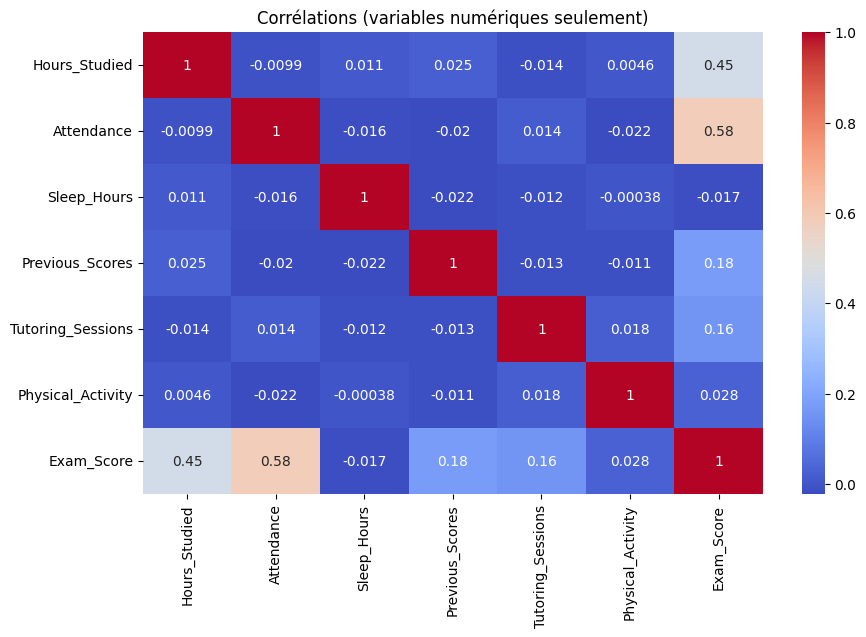

In [51]:
import seaborn as sns

# Garder uniquement les colonnes numériques
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corrélations (variables numériques seulement)")
plt.show()


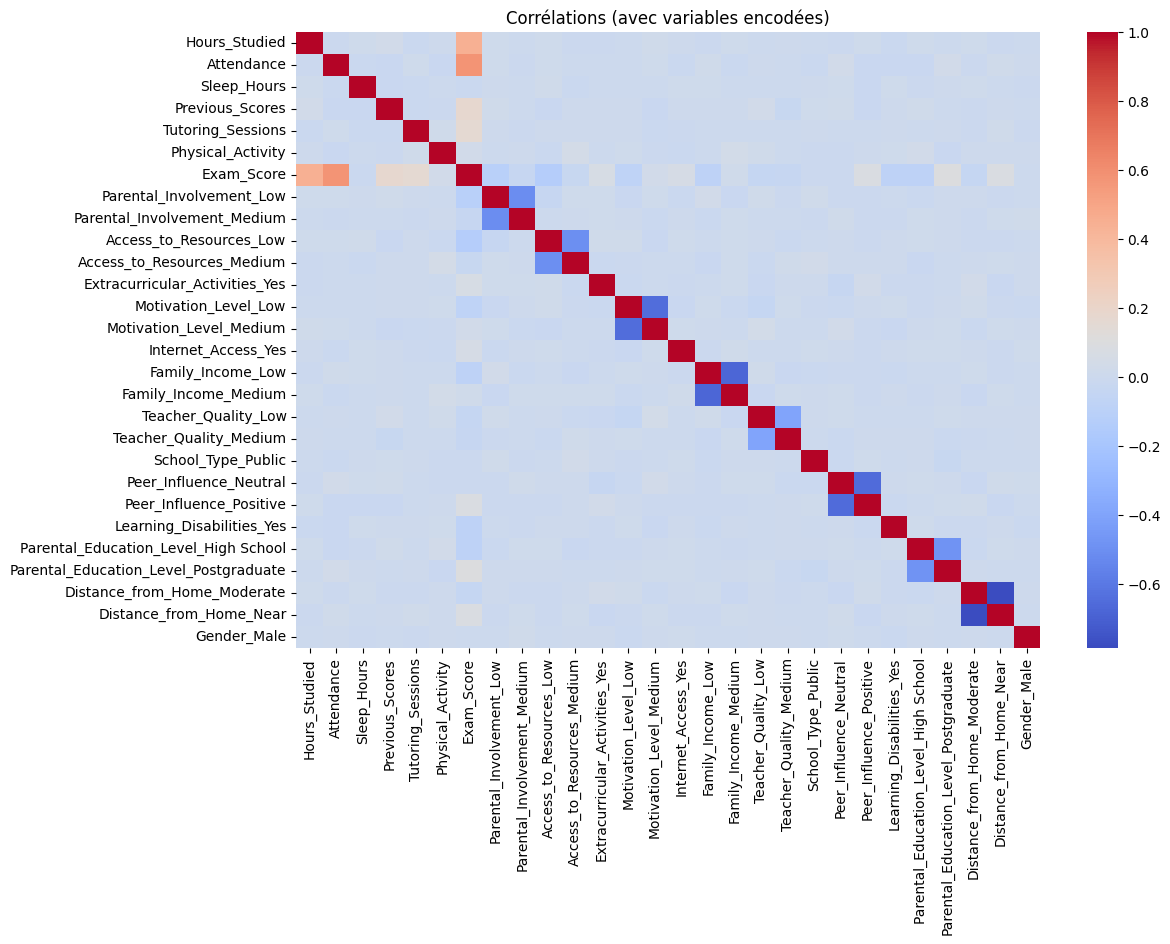

In [52]:
# Encodage one-hot (transforme 'Low', 'High', etc. en colonnes binaires)
df_encoded = pd.get_dummies(df, drop_first=True)

# Heatmap sur le nouveau DF encodé
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")  # annot=False pour ne pas surcharger
plt.title("Corrélations (avec variables encodées)")
plt.show()